### Подключаем библиотеки, display и Math для визуализации формул, numpy - для построения графиков (понадобится позже)

In [96]:
from IPython.display import display, Math
import numpy as np

### Определяем функцию для создания узла дерева для хранения целых чисел

In [97]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

### Определите функции для доступа к компонентам узла дерева выражения:
* ID(x) - возвращает идентификатор узла
* items(x) - возвращает список дочерних узлов
* options(x) - возвращает словарь с параметрами узла
* isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов


In [98]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1:-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(x) == 2

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

### Определяем функции для преобразования узла в LaTeX-выражение

In [99]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

### Определяем функцию show_ для визуализации формулы, представленной деревом x

In [100]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(a)

<IPython.core.display.Math object>

### Символы
* определяем функцию для генерации узла дерева: дополните список греческих букв, см. [ссылку](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols)
* определяем функцию преобразования символа в LaTeX-формат
* тестируем обе функции

In [101]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma']
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Определяем функции генерации узлов для бинарных и унарных операций
* напишите по аналогии с функцией add_ функции для остальных бинарных операций: вычитания (sub), умножения (mul), деления (div), возведения в степень (deg); логических операций (and, or, xor); операций сравнения (eq, ne, lt, le, gt, ge)
* напишите по аналогии с функцией neg_ функцию для логического отрицания (inv)

In [102]:
def add_(x: tuple, y: tuple) -> tuple:
	return 'add', x, y, {}
def sub_(x: tuple, y: tuple) -> tuple:
	return 'sub', x, y, {}
def mul_(x: tuple, y: tuple) -> tuple:
	return 'mul', x, y, {}
def div_(x: tuple, y: tuple) -> tuple:
	return 'div', x, y, {}
def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}
def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}
def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}
def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}
def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}
def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}
def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}
def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}
def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}
def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}
def neg_(x: tuple) -> tuple:
	return 'neg', x
def inv_(x: tuple) -> tuple:
  return 'inv', x


### Тестируем операции
* создаем целое число a=34 и символы $x$ и $y$
* создаем дерево выражения f=(a+x)*y, используя вышенаписанные функции для бинарных операций
* печатаем это выражение (print)

In [103]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = neg_(add_(mul_(neg_(a), x), y))
print(f)

('neg', ('add', ('mul', ('neg', ('integer', {'value': 34})), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {}))


### Создаем словарь с приоритетами всех операций
* в соответствии с приоритетами этих же операций в языке Python: см. [ссылку](https://www.programiz.com/python-programming/precedence-associativity), приоритет логических операций and, or, xor определяется как для побитовых (bitwise) операций (&, |, ^)
* конкретные значения приоритетов не важны, важны их относительные значения
* создаем функцию для вычисления приоритета заданного узла
* найдите приоритет выражения (a+x)*y из предыдущего пункта

In [104]:
priority = {'deg': 8, 'neg':7, 'inv': 7, 'div': 6, 'mul': 6, 'sub': 5, 'add': 5, 'and': 4, 'xor': 3, 'or': 2, 'eq': 1, 'ne': 1, 'lt': 1, 'le': 1, 'gt': 1, 'ge':1}

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

7


### Определяем функцию "оборачивания" заданного LaTeX-выражения в круглые скобки "адаптивного" размера

Сравните размер скобок: `(\frac{x^2}{y^3})` $\to (\frac{x^2}{y^3})$ и `\left(\frac{x^2}{y^3}\right)` $\to \left(\frac{x^2}{y^3}\right)$

In [105]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

### Определяем функции преобразования всех введенных бинарных и унарных операций в формат LaTeX
* отдельным образом определяются операции возведения в степень $x^y$ и деления $\frac{x}{y}$
* для логических операций используем обозначения $\neg x$, $x \wedge y$, $x \vee y$, $x \oplus y$
* чтобы посмотреть код этой вкладки, сделайте ЗДЕСЬ двойной клик

In [106]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} + {b}"

def latex_mul(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\cdot {b}"

def latex_div(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"\\frac{{{a}}} {{{b}}}"

def latex_deg(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} ^ {b}"

def latex_sub(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} - {b}"

def latex_neg(x: tuple) -> str:
  op, a = ID(x), latex_(x[1])
  a = enclose(a)
  return f"-{{{a}}}"

def latex_inv(x: tuple) -> str:
  op, a = ID(x), latex_(x[1])
  a = enclose(a)
  return f"\\neg{{{a}}}"

def latex_and(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\wedge {b}"

def latex_xor(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\oplus {b}"

def latex_or(x: tuple) -> str:
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\vee {b}"


### Протестируйте определенные функции на различных выражениях
* опциональное (бонусное) задание: проверьте как работают построенные функции на выражениях с унарным минусом и отрицательными числами, придумайте решение найденных проблем (если проблемы не найдены, то задание не засчитывается!)

In [107]:
show_(f)

<IPython.core.display.Math object>

### Определяем класс Expression - обертку для списочных выражений
* включите в него перегрузку всех необходимых бинарных и унарных операций
* определяем функцию fix для принудительного приведения заданного целого числа к объекту класса Expression
* опциональное (бонусное) задание: включите перегрузку тех же бинарных операций с "правым" аргументом (radd, rmul и т.д.)


In [108]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))

  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))

  def __pow__(self, x):
    return Expression(deg_(self.T, fix(x).T))

  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))

  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))

  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))

  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))

  def __neg__(self):
    return Expression(neg_(self.T))

  def __invert__(self):
    return Expression(inv_(self.T))

  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))

  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))

  def __or__(self, x):
    return Expression(or_(self.T, fix(x).T))

def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x

### Создаем обертки для функций integer_  и symbol_
* опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: `x, y, z = symbols('x y z')`

In [109]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))
def symbols(x: str) -> list[Expression]:
  symbols = x.split()
  expressions : list[Expression] = []
  for s in symbols:
    expressions.append(symbol(s))
  return expressions

### Определяем функцию show вывода выражений, заданных классом Expression
* протестируйте работу всех функций на различных выражениях

In [110]:
def show(x: Expression) -> None:
  show_(x.T)

a, x = Z(13), symbol('x_3')
show(a / x)

<IPython.core.display.Math object>

### Визуализация дерева выражения
Дополнительные задания:

* в арифметических узлах должны быть показаны значки операций, а не слова (+ вместо add и т.д.)
* терминальные узлы должны быть выделены отдельным цветом

/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


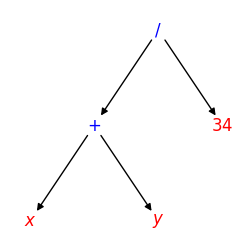

In [111]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, terminate: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    terminate[id_] = f'${latex_(x)}$'
  else:
    sym = ''

    if x[0] == "div":
      sym = "/"
    elif x[0] == 'add':
      sym = "+"
    elif x[0] == 'sub':
      sym = "-"
    elif x[0] == 'mul':
      sym = "*"
    elif x[0] == 'deg':
      sym = "^"

    labels[id_] = f'${sym}$'
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, terminate, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, terminate, labels, links = [], {}, {}, []
  makeGraph(x, nodes, terminate, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = terminate, font_color = "red")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
alo = (x + y) / Z(34)
drawGraph(alo)